In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abcsds/pokemon")

print("Path to dataset files:", path)


100%|██████████| 14.9k/14.9k [00:00<00:00, 9.16MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/abcsds/pokemon/versions/2


In [44]:
import pandas as pd
import numpy as np

In [7]:
original_df = pd.read_csv(path + "/Pokemon.csv")
original_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [12]:
reduced_df = original_df[['HP' , 'Attack' , 'Defense' , 'Sp. Atk' ,
                               'Sp. Def', 'Speed']] # want to predict speed

reduced_df.head() #names are removed


,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65


In [17]:
shuffled = reduced_df.sample(frac=1) #randomizes

# shuffled.head()

training_df = shuffled[:500]  #first 500 used for training
eval_df = shuffled[500:650] #150 used for comparing models
test_df = shuffled[650:] #150 used for testing

len(training_df) , len(model_eval) , len(test_df)

(500, 150, 150)

In [25]:
x_train , y_train = training_df.to_numpy()[:, :-1] , training_df.to_numpy()[:, -1]
#use up to the last colum for training, wanting to predict the final column

x_eval , y_eval = eval_df.to_numpy()[:, :-1] , eval_df.to_numpy()[:, -1]

x_test , y_test = test_df.to_numpy()[:, :-1] , test_df.to_numpy()[:, -1]

(x_train.shape , y_train.shape) , (x_eval.shape , y_eval.shape) , (x_test.shape , y_test.shape)
#test to see shape is expected

(((500, 5), (500,)), ((150, 5), (150,)), ((150, 5), (150,)))

In [20]:
from sklearn.preprocessing import MinMaxScaler

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: >]], dtype=object)

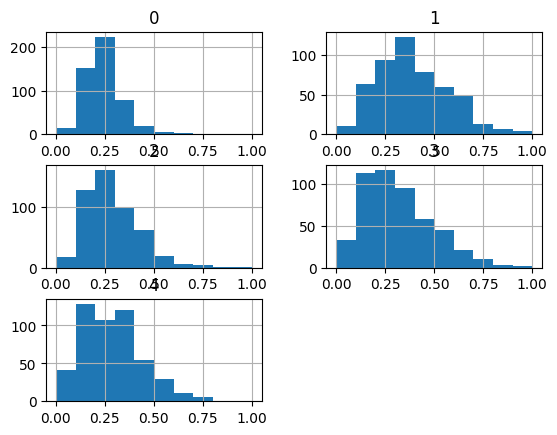

In [40]:
scalar = MinMaxScaler().fit(x_train)

x_train_scaled, x_eval_scaled, x_test_scaled  = scalar.transform(x_train) , scalar.transform(x_eval) ,scalar.transform(x_test)

pd.DataFrame(x_train_scaled).head()
pd.DataFrame(x_train_scaled).hist()
#histograms look quite different since data amount is small
# pd.DataFrame(x_eval_scaled).hist()
# pd.DataFrame(x_test_scaled).hist()

In [48]:
from sklearn.metrics import mean_absolute_error

In [49]:
#baseline model
## use the average for all predictions without considering input
average_speed = y_train.mean()

mean_absolute_error(y_eval , [average_speed]*len(y_eval))


26.021759999999997

In [50]:
from sklearn.linear_model import LinearRegression

In [53]:
linear_model = LinearRegression().fit(x_train , y_train)
mean_absolute_error(y_eval , linear_model.predict(x_eval))
#slight improvement in prediction

20.57918360786977

In [54]:
from sklearn.ensemble import RandomForestRegressor


In [58]:
random_forest = RandomForestRegressor().fit(x_train , y_train)
mean_absolute_error(y_eval , random_forest.predict(x_eval))

#slightly better but linear regression is easier to explain so may not be worth

20.406000000000002

In [59]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [70]:
model_1 = Sequential([layers.Input((5,)),
                      layers.Dense(1)])

model_1.compile(optimizer=Adam(learning_rate=0.01),
                metrics = ['mean_absolute_error'],
                loss='mse')

model_1.fit(x = x_train_scaled , y = y_train , validation_data = (x_eval_scaled , y_eval) , epochs = 100)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5328.6904 - mean_absolute_error: 67.4602 - val_loss: 6220.3354 - val_mean_absolute_error: 72.1788
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5303.6689 - mean_absolute_error: 66.6092 - val_loss: 6159.3794 - val_mean_absolute_error: 71.7724
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5352.7378 - mean_absolute_error: 67.7853 - val_loss: 6098.8408 - val_mean_absolute_error: 71.3666
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5168.1997 - mean_absolute_error: 65.6948 - val_loss: 6039.4004 - val_mean_absolute_error: 70.9658
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5128.4805 - mean_absolute_error: 65.4524 - val_loss: 5980.1743 - val_mean_absolute_error: 70.5641
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5125.2642 - mean_absolute_error: 65.8358 - val_loss: 5921.3315 - val_mean_absolute_error: 70.1627
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss

In [84]:
model_2 = Sequential([layers.Input((5,)),
                      layers.Dense(64, activation = 'relu'),
                      layers.Dropout(0.1),
                      layers.Dense(32,  activation = 'tanh'),
                      layers.Dropout(0.1),
                      layers.Dense(16,  activation = 'relu'),
                      layers.Dense(1)])

model_2.compile(optimizer=Adam(learning_rate=0.001),
                metrics = ['mean_absolute_error'],
                loss='mse')

model_2.fit(x = x_train_scaled , y = y_train , validation_data = (x_eval_scaled , y_eval) , epochs = 120)

Epoch 1/120
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 5296.2188 - mean_absolute_error: 67.3639 - val_loss: 6232.0342 - val_mean_absolute_error: 72.2415
Epoch 2/120
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5143.5200 - mean_absolute_error: 66.1671 - val_loss: 6151.0923 - val_mean_absolute_error: 71.7055
Epoch 3/120
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5243.4258 - mean_absolute_error: 66.1534 - val_loss: 5973.8823 - val_mean_absolute_error: 70.5097
Epoch 4/120
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5069.9902 - mean_absolute_error: 65.3181 - val_loss: 5652.5034 - val_mean_absolute_error: 68.2623
Epoch 5/120
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4798.3491 - mean_absolute_error: 63.3748 - val_loss: 5132.6650 - val_mean_absolute_error: 64.4033
Epoch 6/120
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4360.7563 - mean_absolute_error: 59.6756 - val_loss: 4563.6162 - val_mean_absolute_error: 59.8167
Epoch 7/120
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss